<h2>Dataframes and Their Shapes</h2>

In [80]:
import pandas as pd
from matplotlib.pyplot import plot, gca, figure, ylim, xticks, title, show, scatter, ylabel
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_csv('relatedQueries.csv', skiprows=[0, 28, 29])
google_top = df.iloc[:24,:]
google_rising = df.iloc[24:,:]

tesla_data = pd.read_csv('TSLA.csv')
btc_data = pd.read_csv('BTC-USD.csv')
ue_data = pd.read_csv('UNRATE.csv')

df_dict = {
    "Tesla Data": tesla_data,
    "Bitcoin Data": btc_data,
    "Unemployment Data":  ue_data
}

data = {'Data':  [], 'Shape(Rows, Columns)': []}

for df in df_dict:
  data['Data'].append(df)
  data['Shape(Rows, Columns)'].append(df_dict[df].shape)

new_data = pd.DataFrame(data)
print(new_data)

                Data Shape(Rows, Columns)
0         Tesla Data             (252, 7)
1       Bitcoin Data             (367, 7)
2  Unemployment Data             (917, 2)


<h2>Tesla Data Table</h2>
<p>Volume represents the volume of search queries for Tesla stock.</p>

In [2]:
tesla_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-22,250.77,265.00,248.25,264.61,264.61,166875900
1,2023-06-23,259.29,262.45,252.80,256.60,256.60,176584100
2,2023-06-26,250.07,258.37,240.70,241.05,241.05,179990600
3,2023-06-27,243.24,250.39,240.85,250.21,250.21,164968200
4,2023-06-28,249.70,259.88,248.89,256.24,256.24,159770800
...,...,...,...,...,...,...,...
247,2024-06-14,185.80,186.00,176.92,178.01,178.01,82038200
248,2024-06-17,177.92,188.81,177.00,187.44,187.44,109786100
249,2024-06-18,186.56,187.20,182.37,184.86,184.86,68982300
250,2024-06-20,184.68,185.21,179.66,181.57,181.57,55893100


<h2>Tesla Data Description</h2>

In [3]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.00,252.00,252.00,252.00,252.00,252.00
mean,218.01,222.03,213.80,217.90,217.90,"108,676,010.71"
std,37.27,37.74,36.70,37.27,37.27,"27,208,751.78"
min,140.56,144.44,138.80,142.05,142.05,"50,869,700.00"
25%,181.95,184.50,176.98,180.00,180.00,"91,789,600.00"
50%,220.61,225.37,216.25,219.94,219.94,"107,691,750.00"
75%,250.27,255.39,245.02,251.20,251.20,"122,661,000.00"
max,296.04,299.29,289.52,293.34,293.34,"243,869,700.00"


<h2>Tesla Data Resampled to Monthly Data</h2>

In [18]:
monthly_tesla = tesla_data.resample('M', on='Date').sum()
monthly_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-30,"1,771.70","1,821.28","1,744.99","1,787.98","1,787.98",1091740600
2023-07-31,"5,492.39","5,570.50","5,383.48","5,470.11","5,470.11",2392089000
2023-08-31,"5,566.86","5,675.36","5,466.18","5,573.66","5,573.66",2501580900
2023-09-30,"5,146.10","5,241.88","5,044.26","5,139.36","5,139.36",2439306100
2023-10-31,"5,222.13","5,332.02","5,112.07","5,211.97","5,211.97",2590570100
2023-11-30,"4,809.25","4,896.62","4,698.58","4,817.65","4,817.65",2650798400
2023-12-31,"4,939.34","5,024.45","4,864.78","4,942.76","4,942.76",2294598400
2024-01-31,"4,566.60","4,629.30","4,478.08","4,538.74","4,538.74",2343784600
2024-02-29,"3,834.72","3,912.09","3,766.23","3,855.86","3,855.86",2019907700


<h2>Tesla's Highest Search Volume Information</h2>

In [4]:
vol_max_index = tesla_data['Volume'].idxmax()
tesla_data.loc[vol_max_index]

Date         2024-04-29
Open             188.42
High             198.87
Low              184.54
Close            194.05
Adj Close        194.05
Volume        243869700
Name: 214, dtype: object

<h2>Tesla Web Search Volume vs. Stock Price</h2>

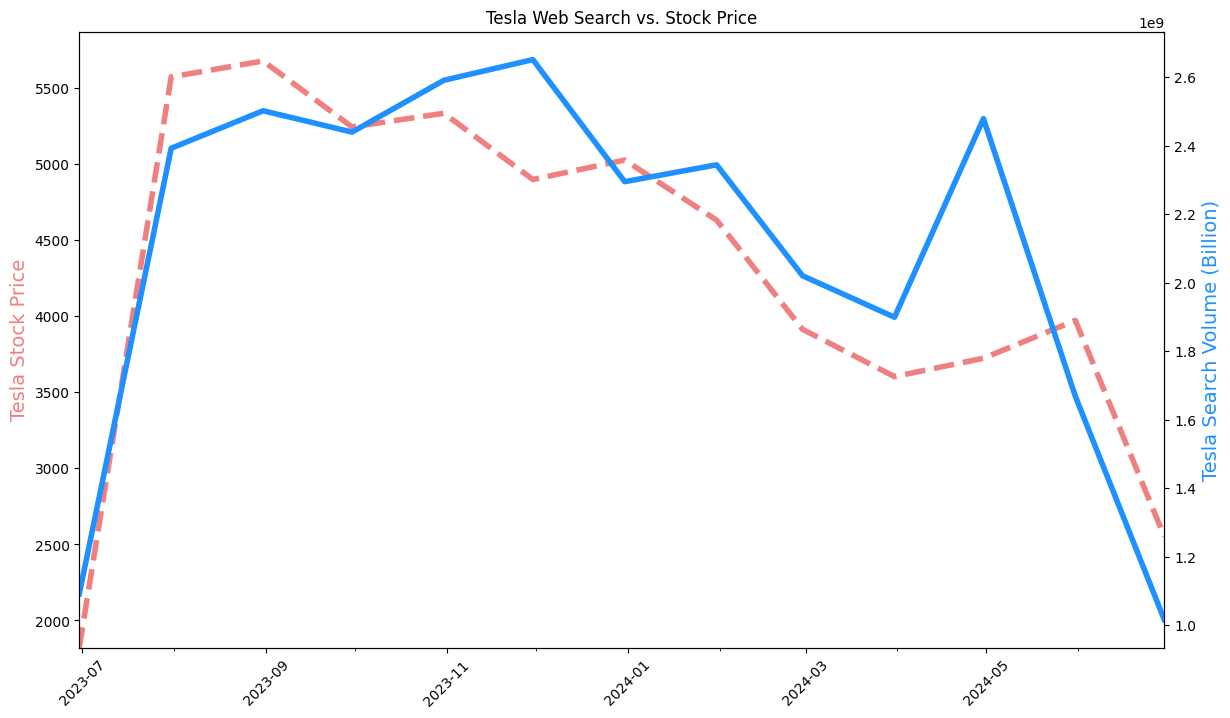

In [91]:
pd.options.display.float_format = '{:,.2f}'.format
from matplotlib import dates

figure(figsize=(14, 8))
months = dates.MonthLocator()

ax1 = gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Tesla Stock Price', color='lightcoral', fontsize=14)
ax1.xaxis.set_minor_locator(months)
ax2.set_ylabel('Tesla Search Volume (Billion)', color='dodgerblue', fontsize=14)

ax1.plot(monthly_tesla['High'], '--', color='lightcoral', linewidth=4)
ax2.plot(monthly_tesla['Volume'], color='dodgerblue', linewidth=4)

ax1.tick_params(axis='x', labelrotation=45)
title("Tesla Web Search vs. Stock Price")

ax1.set_xlim(monthly_tesla.index.min(), monthly_tesla.index.max())
ax1.set_ylim(monthly_tesla['High'].min())
show()

<h2>Bitcoin Data Table</h2>
<p>Volume represents the number of search queries for Bitcoin stock information.</p>

In [5]:
btc_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-22,"29,995.94","30,496.00","29,679.16","29,912.28","29,912.28",20653160491
1,2023-06-23,"29,896.38","31,389.54","29,845.21","30,695.47","30,695.47",24115570085
2,2023-06-24,"30,708.74","30,804.15","30,290.15","30,548.70","30,548.70",12147822496
3,2023-06-25,"30,545.15","31,041.27","30,327.94","30,480.26","30,480.26",12703464114
4,2023-06-26,"30,480.52","30,636.03","29,955.74","30,271.13","30,271.13",16493186997
...,...,...,...,...,...,...,...
362,2024-06-18,"66,490.98","66,556.70","64,066.96","65,140.75","65,140.75",39481285950
363,2024-06-19,"65,146.66","65,695.35","64,693.30","64,960.30","64,960.30",21103423504
364,2024-06-20,"64,960.30","66,438.96","64,547.85","64,828.66","64,828.66",25641109124
365,2024-06-21,"64,837.99","65,007.55","63,378.89","64,096.20","64,096.20",26188171739


<h2>Largest Volume of Bitcoin Searches</h2>

In [7]:
btc_max_search = btc_data['Volume'].idxmax()
btc_data.loc[btc_max_search]

Date           2024-03-05
Open            68,341.05
High            69,170.62
Low             59,323.91
Close           63,801.20
Adj Close       63,801.20
Volume       102802940877
Name: 257, dtype: object

<h2>Bitcoin Data Resampled to Monthly Data</h2>

In [17]:
monthly_btc = btc_data.resample('M', on='Date').sum()
monthly_btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-30,"273,125.15","278,130.17","269,914.16","273,604.85","273,604.85",156681699924
2023-07-31,"933,061.79","942,551.27","923,664.99","931,781.57","931,781.57",382224489090
2023-08-31,"866,752.46","874,340.36","853,053.49","863,436.58","863,436.58",437724169499
2023-09-30,"788,138.05","797,218.26","781,235.47","789,184.09","789,184.09",337637313742
2023-10-31,"914,866.14","934,832.91","906,301.86","922,432.75","922,432.75",476425634860
2023-11-30,"1,094,750.00","1,112,778.07","1,078,827.71","1,097,884.95","1,097,884.95",570863267380
2023-12-31,"1,314,444.95","1,338,094.04","1,293,119.16","1,318,953.70","1,318,953.70",721704910480
2024-01-31,"1,330,210.48","1,357,352.48","1,301,208.05","1,330,507.98","1,330,507.98",825918941347
2024-02-29,"1,427,720.09","1,462,194.94","1,410,988.06","1,446,380.05","1,446,380.05",830721862621


<h2>Bitcoin Data Description</h2>

In [6]:
btc_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.00,367.00,367.00,367.00,367.00,367.00
mean,"45,024.06","45,863.27","44,213.46","45,117.39","45,117.39","23,498,385,857.44"
std,"16,017.02","16,430.06","15,527.48","16,029.78","16,029.78","14,139,287,307.67"
min,"25,160.66","25,858.38","24,930.30","25,162.65","25,162.65","5,331,172,801.00"
25%,"29,879.21","30,189.86","29,619.19","29,882.65","29,882.65","13,281,128,572.50"
50%,"42,126.12","43,065.60","41,497.01","42,156.90","42,156.90","20,181,001,451.00"
75%,"63,467.13","64,552.92","61,686.85","63,634.04","63,634.04","29,306,472,378.50"
max,"73,079.38","73,750.07","71,334.09","73,083.50","73,083.50","102,802,940,877.00"


<h2>Bitcoin Web Search Volume vs. Price</h2>

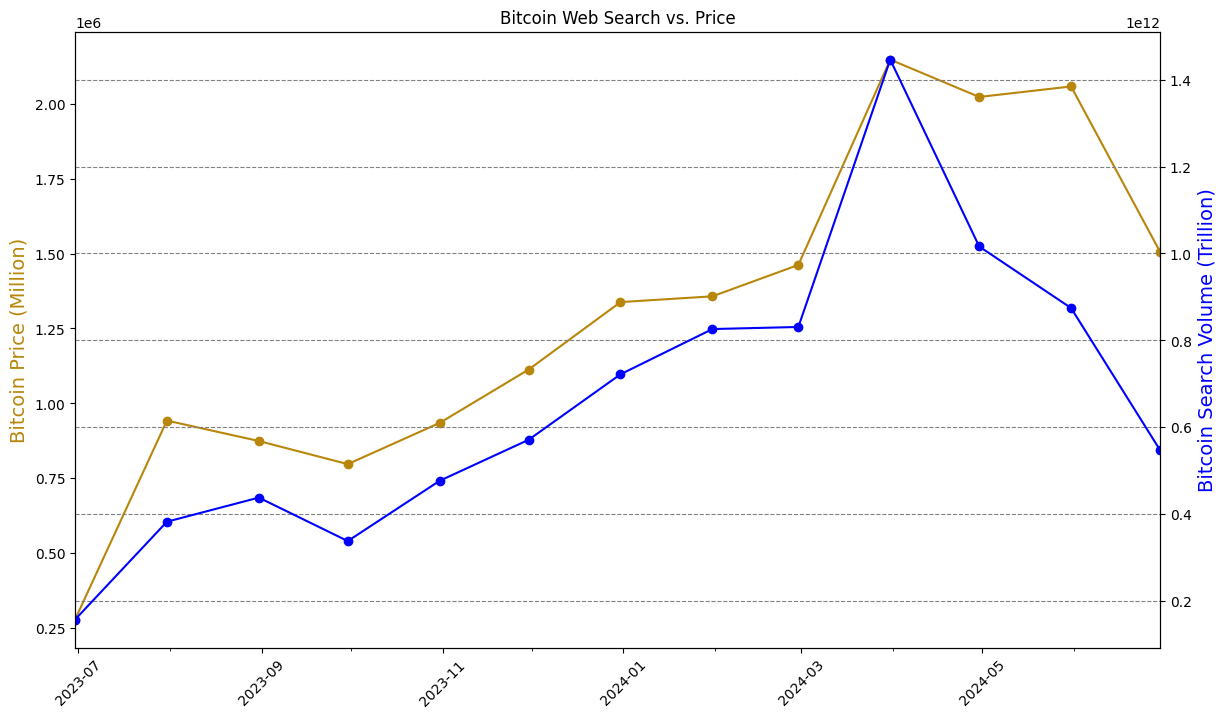

In [89]:
from matplotlib.pyplot import grid
from matplotlib import dates


months = dates.MonthLocator()

figure(figsize=(14, 8))

ax1 = gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Bitcoin Price (Million)', color='darkgoldenrod', fontsize=14)
ax1.xaxis.set_minor_locator(months)
ax2.set_ylabel('Bitcoin Search Volume (Trillion)', color='blue', fontsize=14)

grid(linestyle='--', color='grey')
ax1.plot(monthly_btc['High'], color='darkgoldenrod')
ax1.scatter(x=monthly_btc.index, y=monthly_btc['High'], color='darkgoldenrod')
ax2.plot(monthly_btc['Volume'], color='blue')
ax2.scatter(x=monthly_btc.index, y=monthly_btc['Volume'], color='blue')
ax1.tick_params(axis='x', labelrotation=45)
title('Bitcoin Web Search vs. Price')

ax1.set_xlim(monthly_btc.index.min(), monthly_btc.index.max())


show()



<h2>US FRED Unemployment Data</h2>

In [8]:
ue_data

,DATE,UNRATE
0,1948-01-01,3.40
1,1948-02-01,3.80
2,1948-03-01,4.00
3,1948-04-01,3.90
4,1948-05-01,3.50
...,...,...
912,2024-01-01,3.70
913,2024-02-01,3.90
914,2024-03-01,3.80
915,2024-04-01,3.90


<h2>US FRED Unemployment Data Graph</h2>

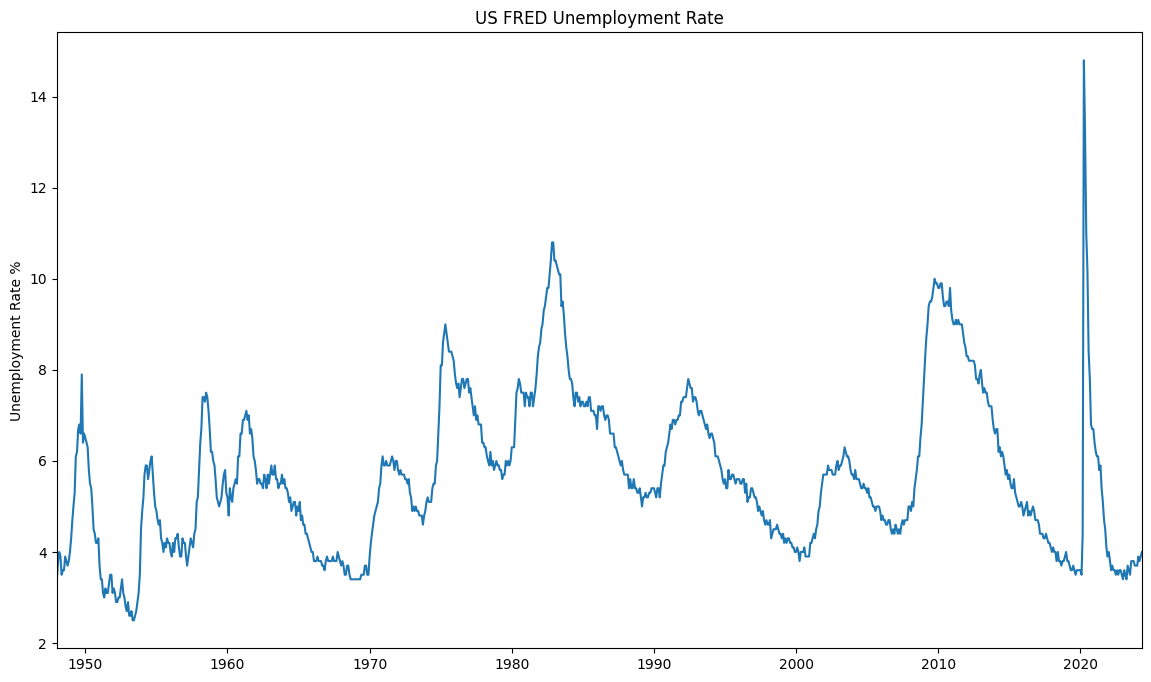

In [79]:
from matplotlib.pyplot import xlim
figure(figsize=(14, 8))

plot(ue_data['DATE'], ue_data['UNRATE'])
ylabel('Unemployment Rate %')
xlim(ue_data['DATE'].min(), ue_data['DATE'].max())
title('US FRED Unemployment Rate')
show()

<h2>Time of Highest Unemployment Rate</h2>

In [9]:
max_ue_index = ue_data['UNRATE'].idxmax()
ue_data.loc[max_ue_index]

DATE      2020-04-01
UNRATE         14.80
Name: 867, dtype: object

<h2>Checking For Missing Data</h2>

In [10]:
print(f"Missing values for Tesla data? {tesla_data.isna().values.any()}")
print(f"Missing values for unemployment data? {ue_data.isna().values.any()}")
print(f"Missing values for Bitcoin data? {btc_data.isna().values.any()}")

Missing values for Tesla data? False
Missing values for unemployment data? False
Missing values for Bitcoin data? False
